<a href="https://colab.research.google.com/github/meyfemi/house-pricing-prediction/blob/main/AI_DS_assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
plt.style.use('ggplot')
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.preprocessing import RobustScaler


Mounted at /content/drive


In [ ]:
train = pd.read_csv('drive/My Drive/Colab Notebooks/AI_Assessment_Dataset/msc_training_dataset.csv')
test = pd.read_csv('drive/My Drive/Colab Notebooks/AI_Assessment_Dataset/msc_testing_dataset.csv')


**Shape of Train dataset**

In [ ]:
train.shape

(3000, 12)

**Shape of Test dataset**

In [ ]:
test.shape

(999, 12)

In [ ]:
train.describe()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2.990000,1.489000,1.522000,1.998333,0.490333,0.488667,0.485000,0.495667,0.512333,0.480667,0.499667,8606.600000
std,1.424281,0.499962,0.499599,0.813153,0.499990,0.499955,0.499858,0.500065,0.499931,0.499709,0.500083,2216.248563
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2235.000000
25%,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7005.000000
50%,3.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,8615.000000
75%,4.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10215.000000
max,5.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15035.000000


In [ ]:
train.dtypes

room            int64
bathroom        int64
kitchen         int64
french_door     int64
backyard        int64
furnished       int64
green_paint     int64
solar_power     int64
woodfloor       int64
qlm_security    int64
club_access     int64
price           int64
dtype: object

**Box Plot**

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(1, 0, 'room'),
  Text(2, 0, 'bathroom'),
  Text(3, 0, 'kitchen'),
  Text(4, 0, 'french_door'),
  Text(5, 0, 'backyard'),
  Text(6, 0, 'furnished'),
  Text(7, 0, 'green_paint'),
  Text(8, 0, 'solar_power'),
  Text(9, 0, 'woodfloor'),
  Text(10, 0, 'qlm_security'),
  Text(11, 0, 'club_access'),
  Text(12, 0, 'price')])

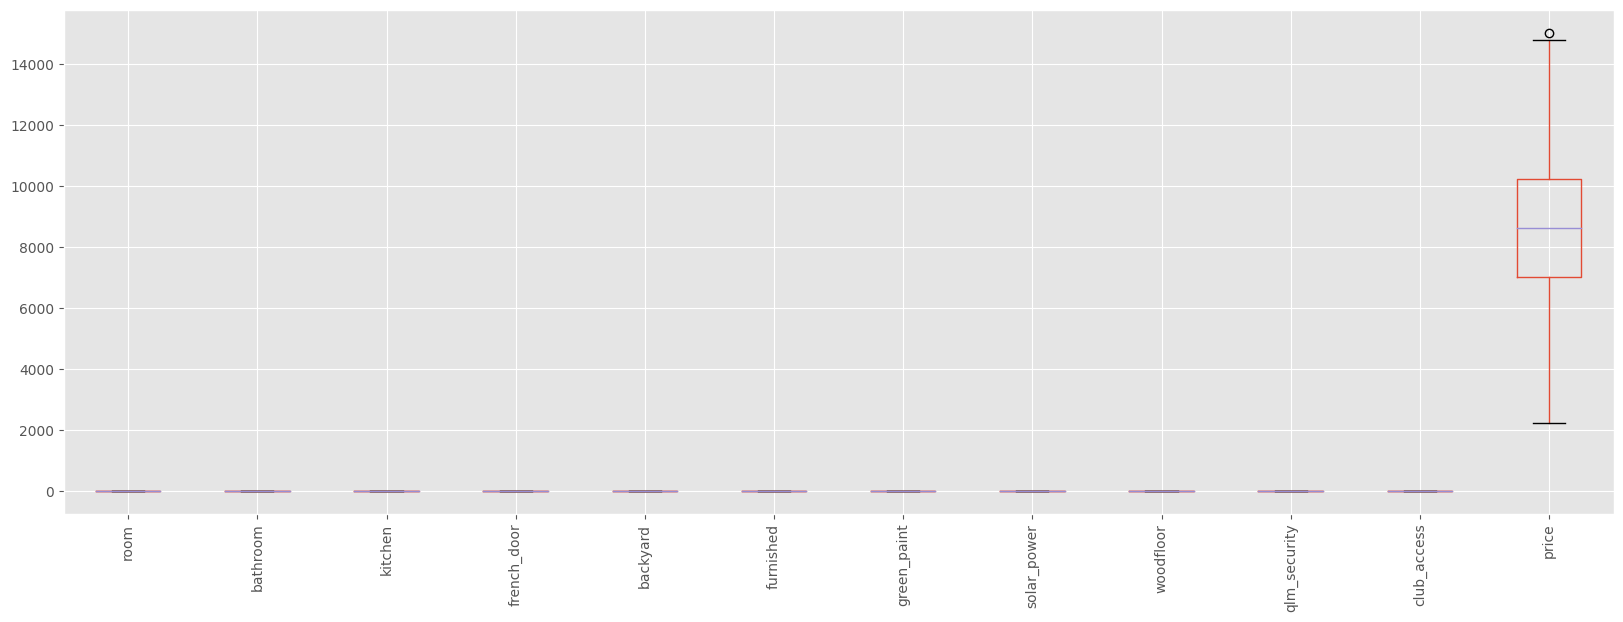

In [ ]:
train.boxplot(figsize=(20,8))
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=90)

In [ ]:
train_X = train.drop('price', axis=1)
test_X = test.drop('price', axis=1)
train_Y = train['price']
test_Y = test['price']

**Plot Graph Function**

In [ ]:
def make_plot(truth, prediction):
  plt.plot(truth, color="red", label="truth")
  plt.plot(prediction, color="blue", label="predicted")
  plt.legend()
  plt.grid()
  plt.title("Comparing truth and predicted regression values")
  plt.tight_layout()
  plt.show()


**Linear Regression Model**

In [ ]:
reg = LinearRegression().fit(train_X, train_Y)

In [ ]:
reg_predicted = reg.predict(test_X)

In [ ]:
print("score: ", reg.score(train_X, train_Y))

score:  1.0


In [ ]:
print("MAE: ", mean_absolute_error(test_Y, reg_predicted))

MAE:  13.000000000000469


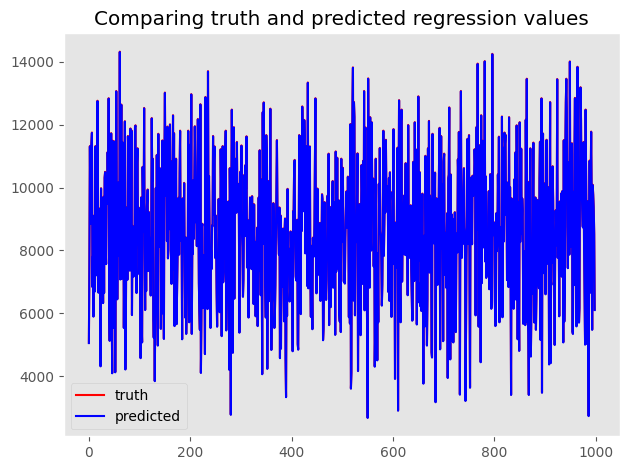

In [ ]:
make_plot(test_Y, reg_predicted)

**Fearture Importance in Linear Regression**

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
# Calculate feature importance using permutation importance
result = permutation_importance(reg, test_X, test_Y, n_repeats=10, random_state=0)
featureImp=[]
# Print feature importance scores
for i in range(len(test_X.columns)):
  featureImp.append((result.importances_mean[i], test_X.columns[i]))

In [ ]:
feature_importances = sorted(list(featureImp))

In [ ]:
feature_importances

[(0.009144395122102456, 'bathroom'),
 (0.013798096188817333, 'green_paint'),
 (0.01522941442628899, 'french_door'),
 (0.01978103037629292, 'qlm_security'),
 (0.025360358030423157, 'kitchen'),
 (0.03182480903027576, 'backyard'),
 (0.05327657571965999, 'club_access'),
 (0.24146966951192503, 'solar_power'),
 (0.3594484261101563, 'woodfloor'),
 (0.40446206349564884, 'furnished'),
 (0.8121832894691033, 'room')]

**Feature importance**

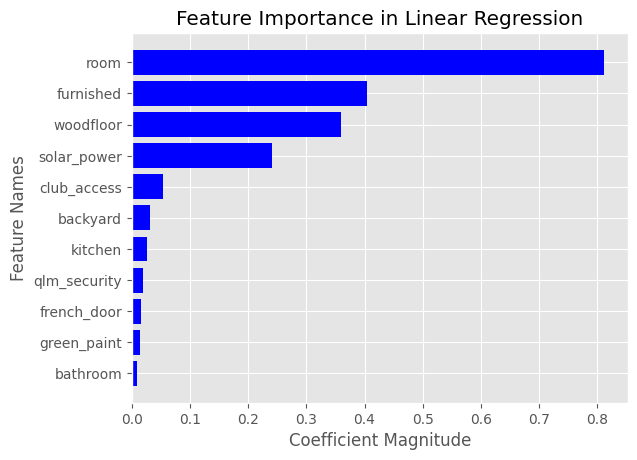

In [ ]:
sorted_coefficients = [x[0] for x in feature_importances]
sorted_feature_names = [x[1] for x in feature_importances]

plt.barh(range(len(sorted_coefficients)), sorted_coefficients, color="blue")
plt.yticks(range(len(sorted_coefficients)), sorted_feature_names)
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature Names')
plt.title('Feature Importance in Linear Regression')
plt.show()

**Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor().fit(train_X, train_Y)
rf_predicted = rf_reg.predict(test_X)
print('Score:', rf_reg.score(train_X, train_Y))
print('MAE:', mean_absolute_error(test_Y, rf_predicted))
print('Test R2 score:', r2_score(test_Y, rf_predicted))
print('Test MSE score:', mean_squared_error(test_Y, rf_predicted))

Score: 0.9984794498313093
MAE: 172.50090090090086
Test R2 score: 0.9895136013604304
Test MSE score: 51531.744644644634


**Perform the Grid Search with cross-validation**

In [ ]:
param_grid = {
    'n_estimators': [5, 10, 15, 20]
}
scoring = {'R2': 'r2', 'MSE': 'neg_mean_squared_error'}


In [ ]:
grid_search = GridSearchCV(rf_reg, param_grid=param_grid, cv=5, scoring=scoring, refit='R2')
grid_search.fit(train_X, train_Y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [5, 10, 15, 20]}, refit='R2',
             scoring={'MSE': 'neg_mean_squared_error', 'R2': 'r2'})

In [ ]:
y_pred = grid_search.predict(test_X)
print('Test R2 score:', r2_score(test_Y, y_pred))
print('Test MSE score:', mean_squared_error(test_Y, y_pred))

Test R2 score: 0.9886678475567331
Test MSE score: 55687.90640640641


**Display the best hyperparameters and corresponding R2 and MSE scores**

In [ ]:
print('Best hyperparameters:', grid_search.best_params_)
print('Best R2 score:', grid_search.best_score_)
print('Best MSE score:', abs(grid_search.cv_results_['mean_test_MSE'][grid_search.best_index_]))

Best hyperparameters: {'n_estimators': 20}
Best R2 score: 0.9857720399158845
Best MSE score: 68992.97216666667


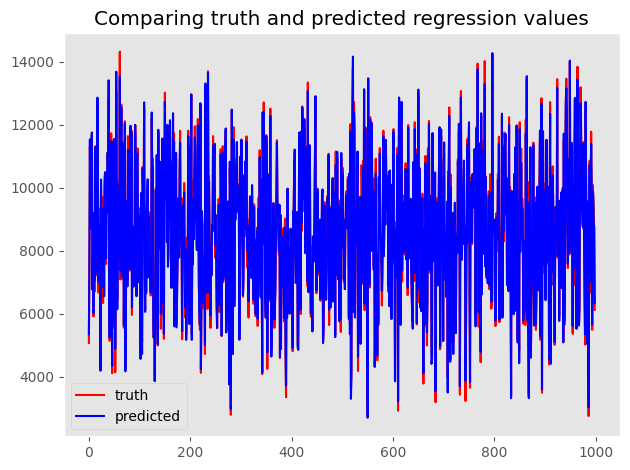

In [ ]:
make_plot(test_Y, y_pred)

**SVM Regression with hyperparameter tuning - Grid Search**

In [ ]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(train_X)
X_test_scaled = scaler.transform(test_X)

**Create an SVM classifier**

In [ ]:
SVR_model = svm.SVR()

**Hyperparameter grid to search**

In [ ]:
hyperparameters = {'kernel': ['linear'],
                   'C': [0.1, 1, 10],
                   'gamma': [0.1, 1, 10],
                   'epsilon': [0.1, 0.2, 0.5]
                   }

In [ ]:
grid_search = GridSearchCV(SVR_model, hyperparameters, cv=5)
grid_search.fit(X_train_scaled, train_Y)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.1, 0.2, 0.5],
                         'gamma': [0.1, 1, 10], 'kernel': ['linear']})

In [ ]:
best_svmreg = grid_search.best_estimator_
print(best_svmreg,'\n')
svm_predicted = best_svmreg.predict(X_test_scaled)

SVR(C=10, gamma=0.1, kernel='linear') 



**Display R2, MSE and MAE**

In [ ]:
print("MSE: %.2f" % mean_squared_error(test_Y, svm_predicted))
print("R2 score: %.2f" % r2_score(test_Y, svm_predicted))
print("MAE score ", mean_absolute_error(test_Y, svm_predicted))

MSE: 168.88
R2 score: 1.00
MAE score  12.995071295840912


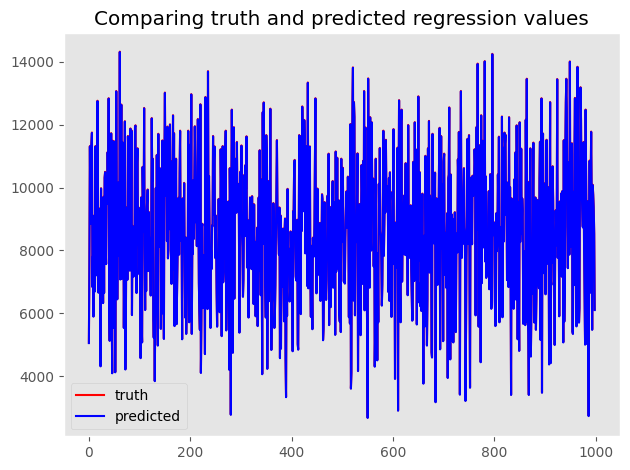

In [ ]:
make_plot(test_Y, svm_predicted)

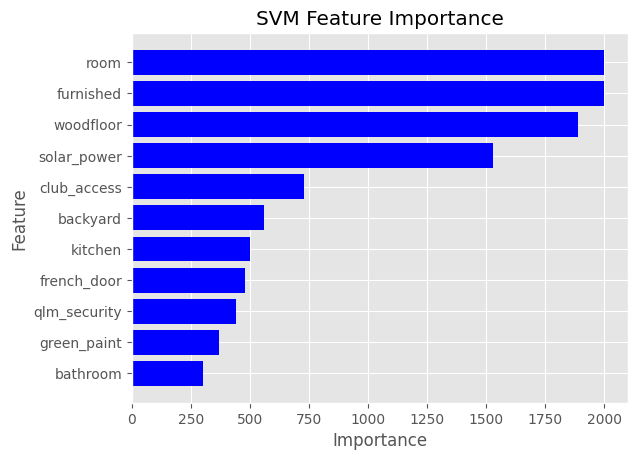

In [ ]:
# Create a dictionary of feature names and their corresponding importances
svm_importances = abs(best_svmreg.coef_[0])

feature_importances = {feature_name: importance for feature_name, importance in zip(train_X.columns, svm_importances)}

# Sort the feature importances in descending order
sorted_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=False)

# Extract the feature names and importances for plotting
features, importances = zip(*sorted_importances)

# Plot a bar chart of the feature importances
plt.barh(features, importances, color="blue")
plt.xticks(rotation=0)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.title("SVM Feature Importance")
plt.show()

In [ ]:
sorted_importances

[('bathroom', 299.9998201818706),
 ('green_paint', 369.99959654356627),
 ('qlm_security', 439.9995503191783),
 ('french_door', 479.99944104014224),
 ('kitchen', 499.9996697852513),
 ('backyard', 559.9996942632688),
 ('club_access', 729.9995890736037),
 ('solar_power', 1529.9985881184223),
 ('woodfloor', 1889.9981698235547),
 ('furnished', 1999.803096330683),
 ('room', 1999.9992582683483)]

In [ ]:
from tabulate import tabulate 
print(tabulate(sorted_importances, headers=['Features', 'Importance'], floatfmt=".6f"))

Features        Importance
------------  ------------
bathroom        299.999820
green_paint     369.999597
qlm_security    439.999550
french_door     479.999441
kitchen         499.999670
backyard        559.999694
club_access     729.999589
solar_power    1529.998588
woodfloor      1889.998170
furnished      1999.803096
room           1999.999258


In [ ]:
test_copy = test.copy()
test_copy['predicted_price'] = svm_predicted.round(2)
test_copy['price_difference'] = (test_copy['price'] - test_copy['predicted_price']).round(2)
test_copy

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price,predicted_price,price_difference
0,1,1,1,3,0,0,1,1,0,1,0,5068,5055.1,12.9
1,5,1,1,2,0,0,0,0,0,1,1,7658,7645.1,12.9
2,5,1,1,3,0,0,0,1,1,1,1,11318,11305.1,12.9
3,4,2,2,1,0,1,1,0,0,1,0,8858,8844.9,13.1
4,5,2,1,1,0,1,1,1,0,0,1,11178,11164.9,13.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,5,2,2,3,1,1,0,0,0,0,0,10088,10074.9,13.1
995,5,1,2,3,1,1,0,0,0,0,0,9788,9774.9,13.1
996,3,2,2,1,0,1,1,1,0,1,0,9388,9374.9,13.1
997,3,2,1,1,1,0,0,1,1,0,0,8528,8515.1,12.9


**Compare models**

Text(0.5, 1.0, 'MAE for various regression algorithms')

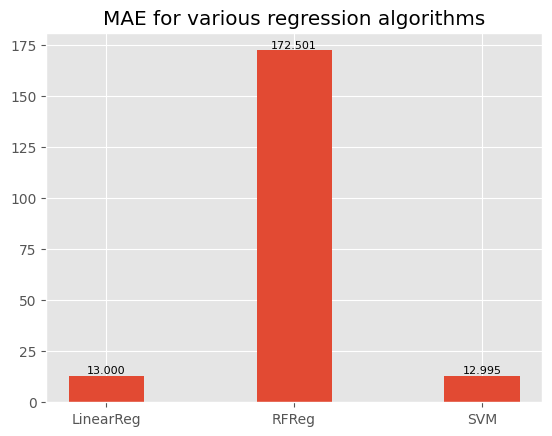

In [ ]:
# Let's plot the mean absolute error of all the algorithms we have tried
reg_mae = mean_absolute_error(test_Y, reg_predicted)
rf_mae = mean_absolute_error(test_Y, rf_predicted)
svm_mae = mean_absolute_error(test_Y, svm_predicted)
errors = [reg_mae, rf_mae, svm_mae]
labels = ["LinearReg", "RFReg", "SVM"]
bars = plt.bar(labels, errors, width=0.4)
for i, v in enumerate(errors):
    plt.text(i, v, "{:.3f}".format(v), ha='center', va='bottom', fontsize=8)

plt.title("MAE for various regression algorithms")

In [ ]:
alg = list(zip(labels, errors ))
alg

[('LinearReg', 13.000000000000469),
 ('RFReg', 172.50090090090086),
 ('SVM', 12.995071295840912)]

**Chart showing the number of rooms**

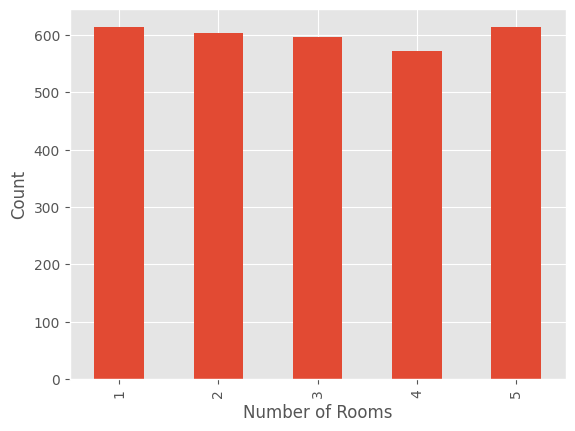

In [ ]:
from matplotlib import colors
grouped_data = train_X.groupby(['room']).size()

# plot the grouped data as a bar graph
grouped_data.plot(kind='bar')

# set the x and y axis labels
plt.xlabel('Number of Rooms')
plt.ylabel('Count')

# show the plot
plt.show()

**Scatter plot**

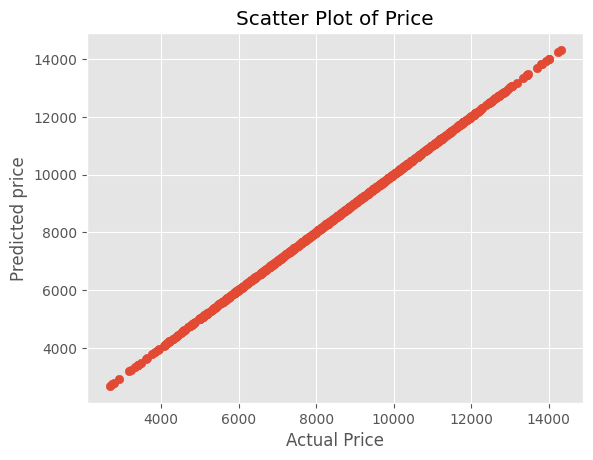

In [ ]:
plt.scatter(test_copy['predicted_price'], test['price'])
plt.title('Scatter Plot of Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted price')
plt.show()